In [2]:
#Examining the History of LEGO Sets
#https://app.datacamp.com/learn/projects/2378


# Import pandas, read and inspect the datasets
import pandas as pd

lego_sets = pd.read_csv('lego_sets.csv')

parent_themes = pd.read_csv('parent_themes.csv')



In [3]:
#1. What percentage of all licensed sets ever released were Star Wars themed?

#Drop missing rows
lego_sets.dropna()
parent_themes.dropna()

#Left Join lego_sets->Left table, parent_themes->Right table
#That way, we can find the total num of licensed sets->licensed_sets
lego_parent_table = lego_sets.merge(parent_themes, left_on='parent_theme', right_on='name', how='left', suffixes=('_lego_set', '_parent_theme'))

licensed_sets = lego_parent_table[lego_parent_table['is_licensed'] == True]

#Query on the lego_sets to find the Star Wars parent themed sets
star_wars_sets = lego_sets.query('parent_theme == "Star Wars"')

#Use of len(), divide and multiply by 100 to find the percentage
the_force = (len(star_wars_sets) / len(licensed_sets)) * 100
the_force = int(round(the_force, 2))
print(the_force)


45


In [4]:
#2. In which year was the highest number of Star Wars sets released?

star_wars_sets = lego_sets[lego_sets['parent_theme']=='Star Wars']
new_era_series = star_wars_sets.value_counts('year')
new_era_df = new_era_series.reset_index()
new_era_df.columns = ['year', 'num_of_releases']
new_era = int(new_era_df.iloc[0,0])
print(new_era)


2016


In [5]:
#3. What are the top 5 parent themes 
#with the most LEGO sets released over the years?

#print(lego_sets.value_counts('parent_theme'))

top5 = lego_sets.value_counts('parent_theme')
top5_df = top5.reset_index()

#print(top5_df.head(5))

top5_list = top5_df['parent_theme'].head(5).tolist()
print("The top 5 parent themes with the most LEGO sets released over the years are: ")
for i in top5_list:
    print(i)

The top 5 parent themes with the most LEGO sets released over the years are: 
Town
Seasonal
Star Wars
Technic
Service Packs


    year  count
18  1999     13
14  2000     31
15  2001     28
8   2002     59
12  2003     43
9   2004     49
13  2005     37
16  2006     27
17  2007     23
11  2008     45
10  2009     48
7   2010     67
6   2011     83
2   2012    119
5   2013    101
4   2014    116
3   2015    117
1   2016    147
0   2017    179


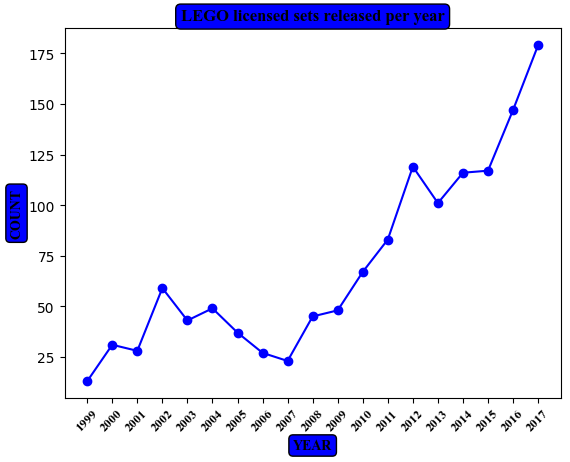

In [6]:
#4. How many licensed LEGO sets were produced each year, and 
#how has this changed over time?
import matplotlib.pyplot as plt

licensed_sets_per_year = licensed_sets.value_counts('year').reset_index().sort_values('year')
#print(licensed_sets_per_year)
print(licensed_sets_per_year)

plt.plot(licensed_sets_per_year['year'], licensed_sets_per_year['count'], marker='o', color='b')
plt.xlabel('YEAR', 
           fontname='Times New Roman', 
           fontweight='bold',
           bbox=dict(facecolor='blue', 
                    edgecolor='black', 
                    boxstyle='round'))
xtcks_val = licensed_sets_per_year['year']
xtcks_lab = licensed_sets_per_year['year']
plt.xticks(xtcks_val, xtcks_lab, 
           fontname='Times New Roman', 
           fontsize=9, 
           color='black', 
           rotation=45, 
           fontweight='bold', 
           ha = 'center', 
           va = 'top')
plt.ylabel('COUNT', 
           fontname='Times New Roman', 
           fontweight='bold',
           bbox=dict(facecolor='blue', 
                    edgecolor='black', 
                    boxstyle='round'))
plt.title('LEGO licensed sets released per year',
          fontname='Times New Roman',
          fontweight='bold',
          bbox=dict(facecolor='blue', 
                    edgecolor='black', 
                    boxstyle='round'))
plt.show()


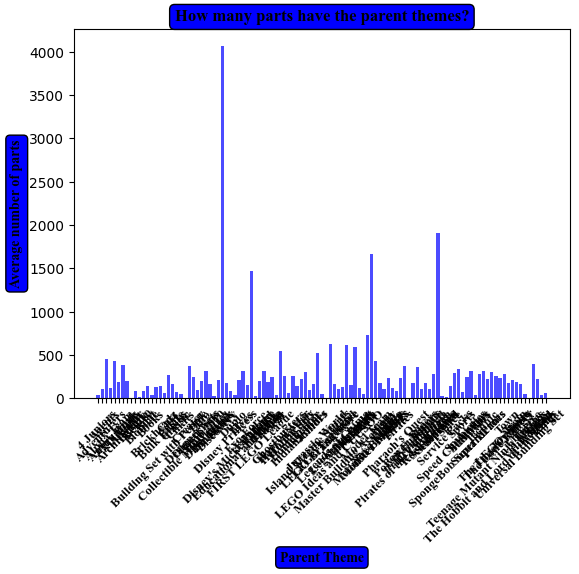


Το Parent Theme με τον μεγαλυτερο μεσο ορο parts ειναι το Disney, με μεσο ορο 4060.0.

Το αμεσως επονεμο ειναι το Sculptures, με μεσο ορο 1904.12, που ειναι σχεδον το μισο απο αυτον του Disney.

Αυτο μας δειχνει οτι η LEGO εχει επενδυσει πολλα parts και sets στην Disney.
 


In [13]:
#5. Which parent theme has the highest 
#average number of parts per set, and 
#how does it compare to other themes?

mean_values = lego_sets.groupby('parent_theme')['num_parts'].mean().round(2)

max_mean_parent_theme = mean_values.idxmax()
max_mean_value = mean_values.max()
#print(f'\nΤο Parent Theme με τον μεγαλυτερο μεσο ορο parts ειναι το {max_mean_parent_theme}, με μεσο ορο {max_mean_value}. ')

mean_values = mean_values.reset_index()
mean_values.columns = ['parent_theme', 'mean_parts_value']
#print(mean_values)

plt.bar(mean_values['parent_theme'], mean_values['mean_parts_value'], color='b', alpha=0.7)
plt.xlabel('Parent Theme',
           fontname='Times New Roman', 
           fontweight='bold',
           bbox=dict(facecolor='blue', 
                    edgecolor='black', 
                    boxstyle='round'))
xtcks_lab = mean_values['parent_theme']
xtcks_val = mean_values['parent_theme']
plt.xticks(xtcks_val, xtcks_lab, 
           fontname='Times New Roman', 
           fontsize=9, 
           color='black', 
           rotation=45, 
           fontweight='bold', 
           ha = 'center', 
           va = 'top')
plt.ylabel('Average number of parts',
           fontname='Times New Roman', 
           fontweight='bold',
           bbox=dict(facecolor='blue', 
                    edgecolor='black', 
                    boxstyle='round'))
plt.title('How many parts have the parent themes?',
          fontname='Times New Roman',
          fontweight='bold',
          bbox=dict(facecolor='blue', 
                    edgecolor='black', 
                    boxstyle='round'))
plt.show()

mean_values_sorted = mean_values.sort_values('mean_parts_value', ascending=False)
print(f'\nΤο Parent Theme με τον μεγαλυτερο μεσο ορο parts ειναι το {max_mean_parent_theme}, με μεσο ορο {max_mean_value}.\n')
print(f'Το αμεσως επονεμο ειναι το {mean_values_sorted.iloc[1, 0]}, με μεσο ορο {mean_values_sorted.iloc[1, 1]}, που ειναι σχεδον το μισο απο αυτον του {max_mean_parent_theme}.\n')
print(f'Αυτο μας δειχνει οτι η LEGO εχει επενδυσει πολλα parts και sets στην {max_mean_parent_theme}.\n ')

